## KNN

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("data.csv")

In [27]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
data.drop(["id", "Unnamed: 32"], axis = 1, inplace = True)

In [29]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

In [31]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                212 non-null    object 
 1   radius_mean              212 non-null    float64
 2   texture_mean             212 non-null    float64
 3   perimeter_mean           212 non-null    float64
 4   area_mean                212 non-null    float64
 5   smoothness_mean          212 non-null    float64
 6   compactness_mean         212 non-null    float64
 7   concavity_mean           212 non-null    float64
 8   concave points_mean      212 non-null    float64
 9   symmetry_mean            212 non-null    float64
 10  fractal_dimension_mean   212 non-null    float64
 11  radius_se                212 non-null    float64
 12  texture_se               212 non-null    float64
 13  perimeter_se             212 non-null    float64
 14  area_se                  2

In [32]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 19 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                357 non-null    object 
 1   radius_mean              357 non-null    float64
 2   texture_mean             357 non-null    float64
 3   perimeter_mean           357 non-null    float64
 4   area_mean                357 non-null    float64
 5   smoothness_mean          357 non-null    float64
 6   compactness_mean         357 non-null    float64
 7   concavity_mean           357 non-null    float64
 8   concave points_mean      357 non-null    float64
 9   symmetry_mean            357 non-null    float64
 10  fractal_dimension_mean   357 non-null    float64
 11  radius_se                357 non-null    float64
 12  texture_se               357 non-null    float64
 13  perimeter_se             357 non-null    float64
 14  area_se                  

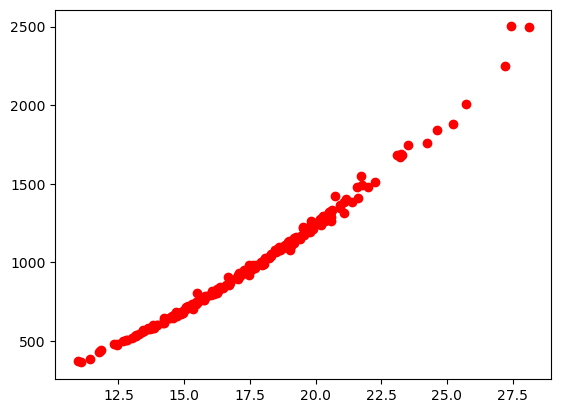

In [33]:
plt.scatter(M.radius_mean, M.area_mean, color = "red", label = "kotu")
plt.show()

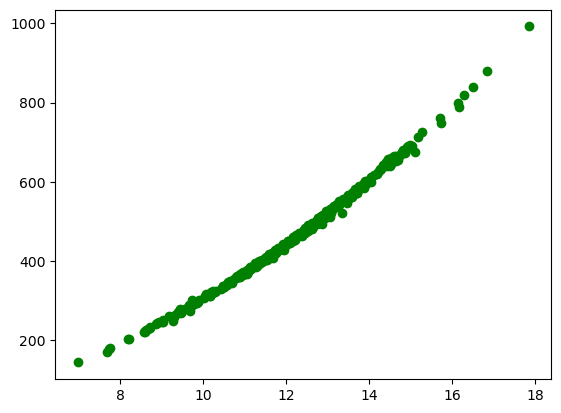

In [34]:
plt.scatter(B.radius_mean, B.area_mean, color = "green", label = "iyi")
plt.show()

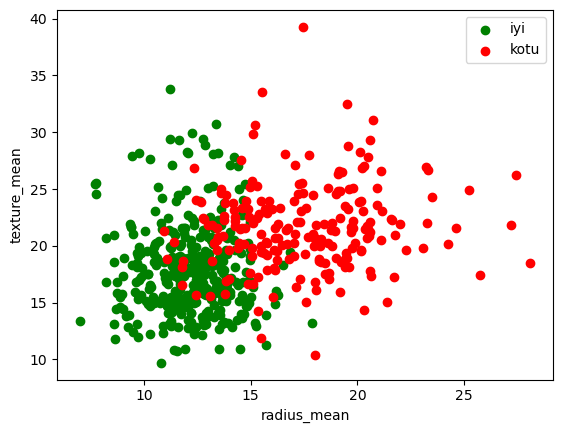

In [35]:
plt.scatter(B.radius_mean, B.texture_mean, color = "green", label = "iyi")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "kotu")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [36]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"], axis = 1)

In [37]:
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

C:\Users\hakan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\hakan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [38]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=1)

In [39]:
# knn model
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

C:\Users\hakan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
prediction

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [43]:
print("{}nn score: {}".format(3,knn.score(x_test, y_test)))

3nn score: 0.9532163742690059


C:\Users\hakan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\hakan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hakan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'score')

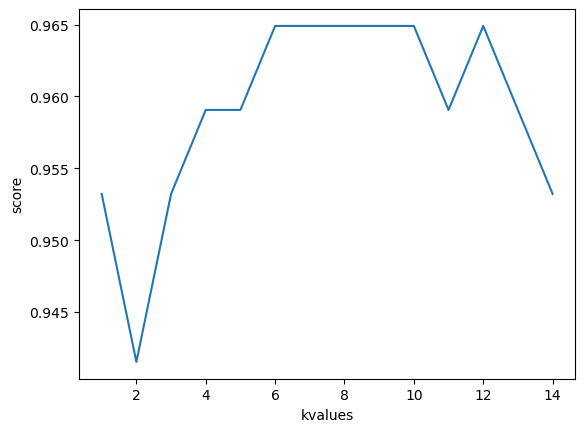

In [45]:
# find k value
scores = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    scores.append(knn2.score(x_test,y_test))

plt.plot(range (1,15), scores)
plt.xlabel("kvalues")
plt.ylabel("score")